# Welcome to pyRT - The Python Raytracer 

## https://github.com/martinchristen/pyRT


The goal of pyRT is teaching computer graphics.
One part of pyrt is the virtual framebuffer where you can draw Pixels using standard algorithms such as Bresenham's line drawing algorithm.

From Version 0.5.0 an additional goal is better Jupyter integration, this is now done in RGBImage.

### 1. Virtual Framebuffer for Pixel Operations


In [ ]:
from pyrt.renderer import RGBImage
from pyrt.math import Vec2, Vec3
import numpy as np
import random

##### Animated Virtual Framebuffer in Jupyter


In [ ]:
w = 320
h = 240
image = RGBImage(w, h)
image.clear(Vec3(0.0,0.0,0.4))

In [ ]:
for i in range(5000):
    position = Vec2(random.randint(0, w - 1), random.randint(0, h - 1))
    color = Vec3(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
   
    image.drawPoint(position, color, 1)

In [ ]:
image.framebuffer()

In [ ]:
for i in range(100):
    pos1 = Vec2(random.randint(0, w - 1), random.randint(0, h - 1))
    pos2 = Vec2(random.randint(0, w - 1), random.randint(0, h - 1))
    color = Vec3(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
   
    image.drawLine(pos1, pos2, color, 2)
    image.update(fps=30)

##### Loading Image

In [ ]:
from pyrt.renderer import loadimage

image2 = loadimage("data/worldmap/world600.jpg")
image2.framebuffer("world")

In [ ]:
image2.drawCircleFilled(Vec2(300,150), radius=10, color=Vec3(1,0,0), fillcolor=Vec3(1,1,0), size=1)
image2.update("world")

In [ ]:
for i in range(100):
    pos = Vec2(random.randint(0, image2.width - 1), random.randint(0, image2.height - 1))
    radius = random.randint(2,20)
    color = Vec3(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
    fillcolor = Vec3(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
   
    image2.drawCircleFilled(pos, radius, color, fillcolor, 1)
    image2.update("world", fps=30)

##### Display Recent Earthquakes on Map  ( data from USGS: https://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php )

In [1]:
import requests
import json
from pyrt.renderer import RGBImage, loadimage
from pyrt.math import Vec2, Vec3

data = requests.get("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson")
with open("earthquakes.geojson","wb") as file:
    file.write(data.content)

In [2]:
with open("earthquakes.geojson") as json_file:
    data = json.load(json_file)


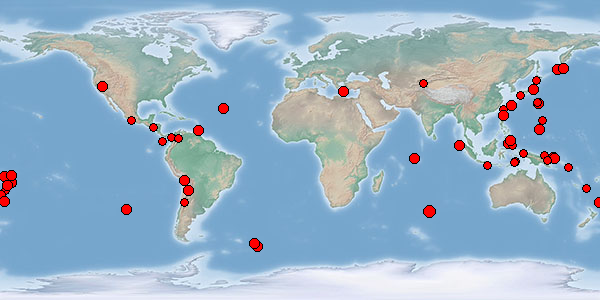

In [3]:
image3 = loadimage("data/worldmap/world600.jpg")

for element in data["features"]:
    mag = element["properties"]["mag"]
    coord = element["geometry"]["coordinates"]
    x = int(image3.width*((coord[0] + 180) / 360))
    y = int(image3.height*((coord[1] + 90) / 180))
    if mag>4.5:
        image3.drawCircleFilled(Vec2(x,y), int(mag), Vec3(0,0,0), Vec3(1,0,0), 1)
image3